## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv('gss_data.csv')
df
pd.set_option('future.no_silent_downcasting', True)
#Remove columns without actual data
df.drop(columns=['id_', 'Unnamed: 14'], inplace=True)

# create mapping groups
mapping = {
    # 0 Parents born in US
    'Neither born in the U.S.': 0,

    # 1 Parent born in US
    'Mother yes, father no': 1,
    'Mother no, father yes': 1,
    "Mother yes, father don't know": 1,
    "Mother don't know, father yes": 1,

    # 2 Parents born in US
    'Both born in the U.S.': 2,

    # Missing / Inapplicable (NaN)
    '.i:  Inapplicable': np.nan,
    '.n:  No answer': np.nan,
    '.s:  Skipped on Web': np.nan,
    "Mother don't know, father don't know": np.nan,
    "Mother no, father don't know": np.nan,
    "Mother don't know, father no": np.nan
}

# Apply the replacement
df['parborn'] = df['parborn'].replace(mapping)

df['parborn'] = pd.to_numeric(df['parborn'], errors='coerce')
df['parborn'].unique()

array([nan,  0.,  2.,  1.])

In [80]:
df['educ'].unique()
educ_mapping = {
    'No formal schooling': 0,
    '1st grade': 1,
    '2nd grade': 2,
    '3rd grade': 3,
    '4th grade': 4,
    '5th grade': 5,
    '6th grade': 6,
    '7th grade': 7,
    '8th grade': 8,
    '9th grade': 9,
    '10th grade': 10,
    '11th grade': 11,
    '12th grade': 12,
    '1 year of college': 13,
    '2 years of college': 14,
    '3 years of college': 15,
    '4 years of college': 16,
    '5 years of college': 17,
    '6 years of college': 18,
    '7 years of college': 19,
    '8 or more years of college': 20,
    '.n:  No answer': np.nan,
    '.d:  Do not Know/Cannot Choose': np.nan
}

# Replace
df['educ'] = df['educ'].replace(educ_mapping)

df['educ'] = pd.to_numeric(df['educ'], errors='coerce')
df['educ'].unique()


array([16., 10., 12., 17., 14., 13.,  6.,  9.,  8., 11.,  7., 15., 20.,
       18.,  3.,  2.,  4.,  5., 19.,  1., nan,  0.])

In [81]:
df['wrkstat'].unique()
wrk_mapping = {
    # High Attachment (2)
    'Working full time': 2,

    # Moderate/Temporary Attachment (1)
    'Working part time': 1,
    'With a job, but not at work because of temporary illness, vacation, strike': 1,

    # No Current Attachment (0)
    'Retired': 0,
    'Keeping house': 0,
    'In school': 0,
    'Unemployed, laid off, looking for work': 0,
    'Other': 0,

    # Missing Data (NaN)
    '.n:  No answer': np.nan,
    '.s:  Skipped on Web': np.nan,
    '.d:  Do not Know/Cannot Choose': np.nan
}

df['wrkstat'] = df['wrkstat'].replace(wrk_mapping)
df['wrkstat'].unique()


array([2, 0, 1, nan], dtype=object)

In [82]:
# turn wrkslf into a binary variable
self_map = {
    'Self-employed': 1,
    'Someone else': 0,
    '.i:  Inapplicable': np.nan,
    '.n:  No answer': np.nan,
    '.d:  Do not Know/Cannot Choose': np.nan,
    '.s:  Skipped on Web': np.nan
}

df['wrkslf'] = df['wrkslf'].replace(self_map)

df['wrkslf'] = pd.to_numeric(df['wrkslf'], errors='coerce')
df['wrkslf'].unique()


array([ 0., nan,  1.])

In [83]:
marital_map = {
    'Never married': 'never_married',
    'Married': 'married',
    'Divorced': 'divorced',
    'Widowed': 'widowed',
    'Separated': 'separated',
    '.n:  No answer': np.nan,
    '.s:  Skipped on Web': np.nan,
    '.d:  Do not Know/Cannot Choose': np.nan
}

# 2. Apply the mapping
df['marital'] = df['marital'].replace(marital_map)
df['marital'].unique()

array(['never_married', 'married', 'divorced', 'widowed', 'separated',
       nan], dtype=object)

In [84]:
sex_mapping = {
    'FEMALE': 'Female',
    'MALE': 'Male',
    '.n:  No answer': np.nan,
    '.i:  Inapplicable': np.nan,
    '.s:  Skipped on Web': np.nan,
    '.d:  Do not Know/Cannot Choose': np.nan
}

df['sex'] = df['sex'].replace(sex_mapping)
df['sex'].unique()

array(['Female', 'Male', nan], dtype=object)

In [85]:
race_mapping = {
    'White': 'White',
    'Black': 'Black',
    'Other': np.nan,
    '.i:  Inapplicable': np.nan,
}

df['race'] = df['race'].replace(race_mapping)
df['race'].unique()

array(['White', 'Black', nan], dtype=object)

In [86]:
born_mapping = {
    'YES': 'Yes',
    'NO': 'No',
    '.i:  Inapplicable': np.nan,
    '.n:  No answer': np.nan,
    '.d:  Do not Know/Cannot Choose': np.nan,
    '.s:  Skipped on Web': np.nan
}

df['born'] = df['born'].replace(born_mapping)
df['born'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [87]:
gran_mapping = {
    'Four': 4,
    'Three': 3,
    'Two': 2,
    'One': 1,
    '.i:  Inapplicable': np.nan,
    '.n:  No answer': np.nan,
    '.d:  Do not Know/Cannot Choose': np.nan,
    '.s:  Skipped on Web': np.nan
}

df['granborn'] = df['granborn'].replace(gran_mapping)

df['granborn'] = pd.to_numeric(df['granborn'], errors='coerce')
df['granborn'].unique()

array([nan,  4.,  2.,  1.,  3.])

In [88]:
earnrs_mapping = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3 or more': 3,
    '.n:  No answer': np.nan,
    '.i:  Inapplicable': np.nan,
    '.s:  Skipped on Web': np.nan,
    '.d:  Do not Know/Cannot Choose': np.nan
}

df['earnrs'] = df['earnrs'].replace(earnrs_mapping)

df['earnrs'] = pd.to_numeric(df['earnrs'], errors='coerce')
df['earnrs'].unique()

array([ 1.,  0.,  2.,  3., nan])

In [89]:
#I decided to set the values to the center of thier bins to make numerical analysis easier
income_mapping = {
    'Under $1,000': 500,
    '$1,000 to $2,999': 2000,
    '$3,000 to $3,999': 3500,
    '$4,000 to $4,999': 4500,
    '$5,000 to $5,999': 5500,
    '$6,000 to $6,999': 6500,
    '$7,000 to $7,999': 7500,
    '$8,000 to $9,999': 9000,
    '$10,000 to $14,999': 12500,
    '$15,000 to $19,999': 17500,
    '$20,000 to $24,999': 22500,
    '$25,000 or more': 30000,
    '.i:  Inapplicable': np.nan,
    '.d:  Do not Know/Cannot Choose': np.nan,
    '.r:  Refused': np.nan,
    '.n:  No answer': np.nan,
    '.s:  Skipped on Web': np.nan
}

df['income'] = df['income'].replace(income_mapping)
df['income'] = pd.to_numeric(df['income'], errors='coerce')
df['income'].unique()

array([   nan, 12500.,  7500.,  4500.,  2000., 17500.,  5500., 22500.,
        3500.,   500.,  9000., 30000.,  6500.])

In [96]:
childs_mapping = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7': 7,
    '8 or more': 8,
    '.d:  Do not Know/Cannot Choose': np.nan,
    '.n:  No answer': np.nan,
    '.s:  Skipped on Web': np.nan,
    '.i:  Inapplicable': np.nan
}

df['childs'] = df['childs'].replace(childs_mapping)

# Ensure it is numeric for your plots
df['childs'] = pd.to_numeric(df['childs'], errors='coerce')
df['childs'].unique()

array([ 0.,  5.,  4.,  2.,  1.,  3.,  6.,  8.,  7., nan])

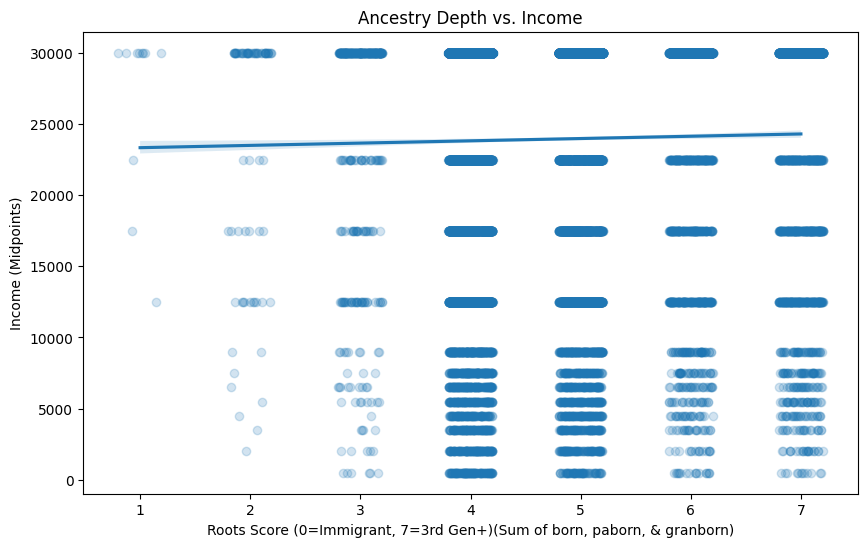

Correlation between Roots Score and Education + Income:
roots_score    1.000000
educ           0.040111
income         0.018796
Name: roots_score, dtype: float64


In [92]:
df['roots_score'] = df['born'].map({'Yes': 1, 'No': 0}) + df['parborn'] + df['granborn']

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='roots_score', y='income', x_jitter=0.2, scatter_kws={'alpha':0.2})
plt.title('Ancestry Depth vs. Income')
plt.xlabel('Roots Score (0=Immigrant, 7=3rd Gen+)(Sum of born, paborn, & granborn)')
plt.ylabel('Income (Midpoints)')
plt.show()

# Check Correlation
print("Correlation between Roots Score and Education + Income:")
print(df[['roots_score', 'educ', 'income']].corr()['roots_score'])

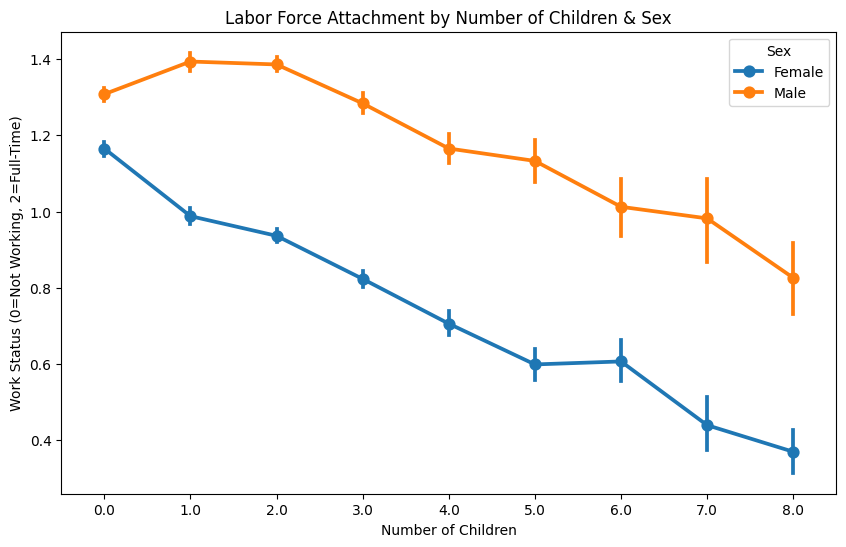

In [100]:

plt.figure(figsize=(10, 6))

# Comparing how 'childs' affects 'wrkstat_numeric' for Men vs Women
sns.pointplot(data=df, x='childs', y='wrkstat', hue='sex')

plt.title('Labor Force Attachment by Number of Children & Sex')
plt.xlabel('Number of Children')
plt.ylabel('Work Status (0=Not Working, 2=Full-Time)')
plt.legend(title='Sex')
plt.show()

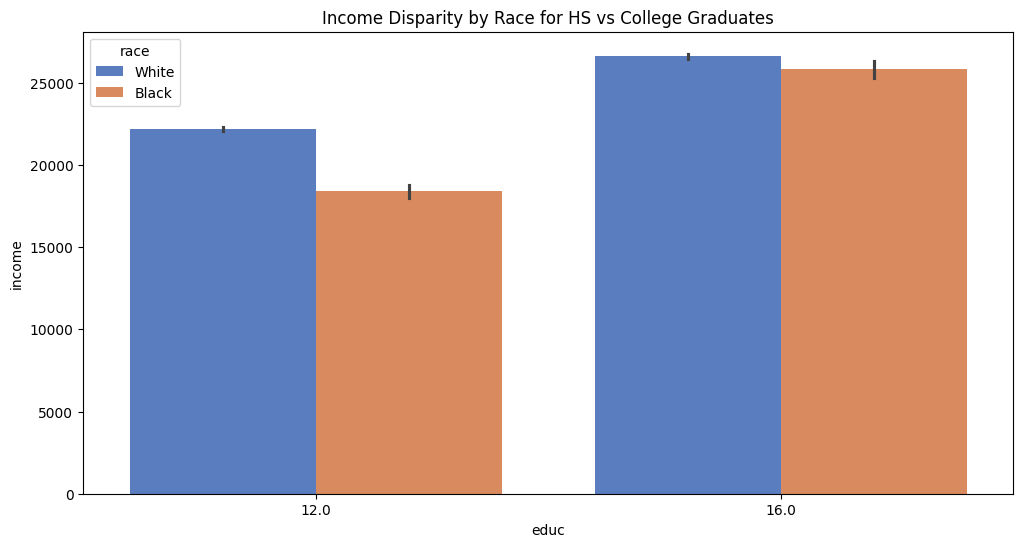

Percentage Self-Employed by Race and Sex:


race   sex   
Black  Female     5.440714
       Male       8.310109
White  Female     9.264493
       Male      15.984273
Name: wrkslf, dtype: float64

In [102]:

edu_check = df[df['educ'].isin([12, 16])]

plt.figure(figsize=(12, 6))
sns.barplot(data=edu_check, x='educ', y='income', hue='race', palette='muted')
plt.title('Income Disparity by Race for HS vs College Graduates')
plt.show()

self_emp_table = df.groupby(['race', 'sex'])['wrkslf'].mean() * 100
print("Percentage Self-Employed by Race and Sex:")
self_emp_table